In [34]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
dataset = pd.read_csv("./dataset_fixeds.csv")
df = pd.read_csv("./dataset_target_scaled.csv")
y = dataset['newBitrates']  # Target

# Tentukan ukuran split
split_index = int(len(y) * 0.7)

# Split data
y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]
# Tentukan ukuran splits


# Cek stasioneritas untuk y_train
from statsmodels.tsa.stattools import adfuller

result_train = adfuller(y_train)
print('ADF Statistic (Train):', result_train[0])
print('p-value (Train):', result_train[1])

if result_train[1] > 0.05:
    print("y_train belum stasioner, kita perlu differencing.")
    y_train_diff = y_train.diff().dropna()  # Apply differencing buat bikin stasioner
else:
    print("y_train udah stasioner.")
    y_train_diff = y_train

y_test_diff = y_test.diff().dropna()

# Cek stasioneritas setelah differencing
result_test_diff = adfuller(y_test_diff)
print('ADF Statistic (Test - Differenced):', result_test_diff[0])
print('p-value (Test - Differenced):', result_test_diff[1])

if result_test_diff[1] <= 0.05:
    print("y_test udah stasioner setelah differencing.")
else:
    print("y_test masih belum stasioner setelah differencing.")

ADF Statistic (Train): -4.0383721540170265
p-value (Train): 0.001222388632153976
y_train udah stasioner.
ADF Statistic (Test - Differenced): -13.163577183257482
p-value (Test - Differenced): 1.2925224249415214e-24
y_test udah stasioner setelah differencing.


                               SARIMAX Results                                
Dep. Variable:            newBitrates   No. Observations:                  411
Model:                 ARIMA(3, 2, 1)   Log Likelihood               -6433.823
Date:                Mon, 16 Sep 2024   AIC                          12877.647
Time:                        20:54:56   BIC                          12897.715
Sample:                             0   HQIC                         12885.587
                                - 411                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0895      0.083      1.079      0.280      -0.073       0.252
ar.L2         -0.0158      0.086     -0.182      0.855      -0.185       0.154
ar.L3          0.0214      0.077      0.280      0.7

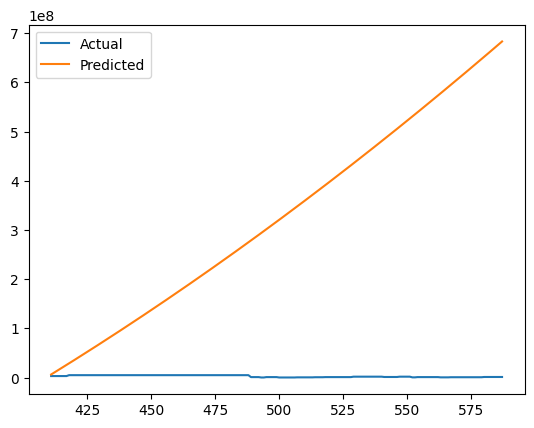

411    6.409644e+06
412    9.624839e+06
413    1.284709e+07
414    1.607654e+07
415    1.931319e+07
           ...     
583    6.654630e+08
584    6.699187e+08
585    6.743815e+08
586    6.788515e+08
587    6.833288e+08
Name: predicted_mean, Length: 177, dtype: float64

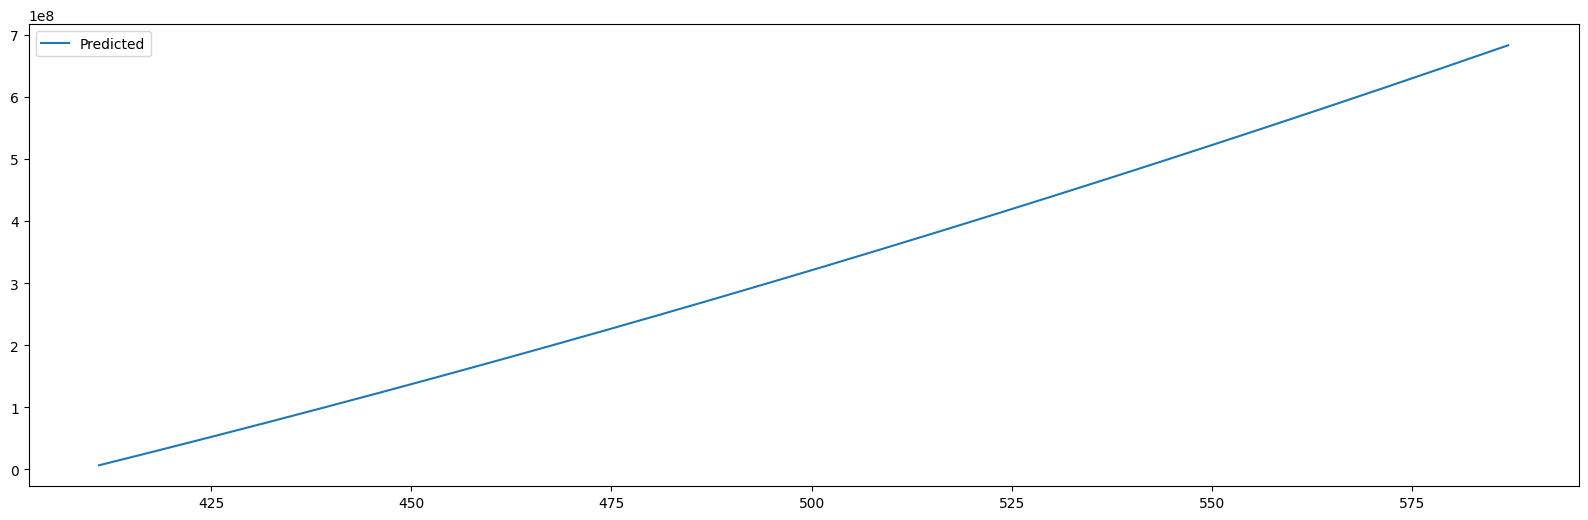

In [45]:
y_pred_original

411    6.409644e+06
412    9.624839e+06
413    1.284709e+07
414    1.607654e+07
415    1.931319e+07
           ...     
583    6.654630e+08
584    6.699187e+08
585    6.743815e+08
586    6.788515e+08
587    6.833288e+08
Name: predicted_mean, Length: 177, dtype: float64